In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)

In [3]:
df = pd.read_csv(r'zomato.csv',encoding='latin-1')

In [4]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

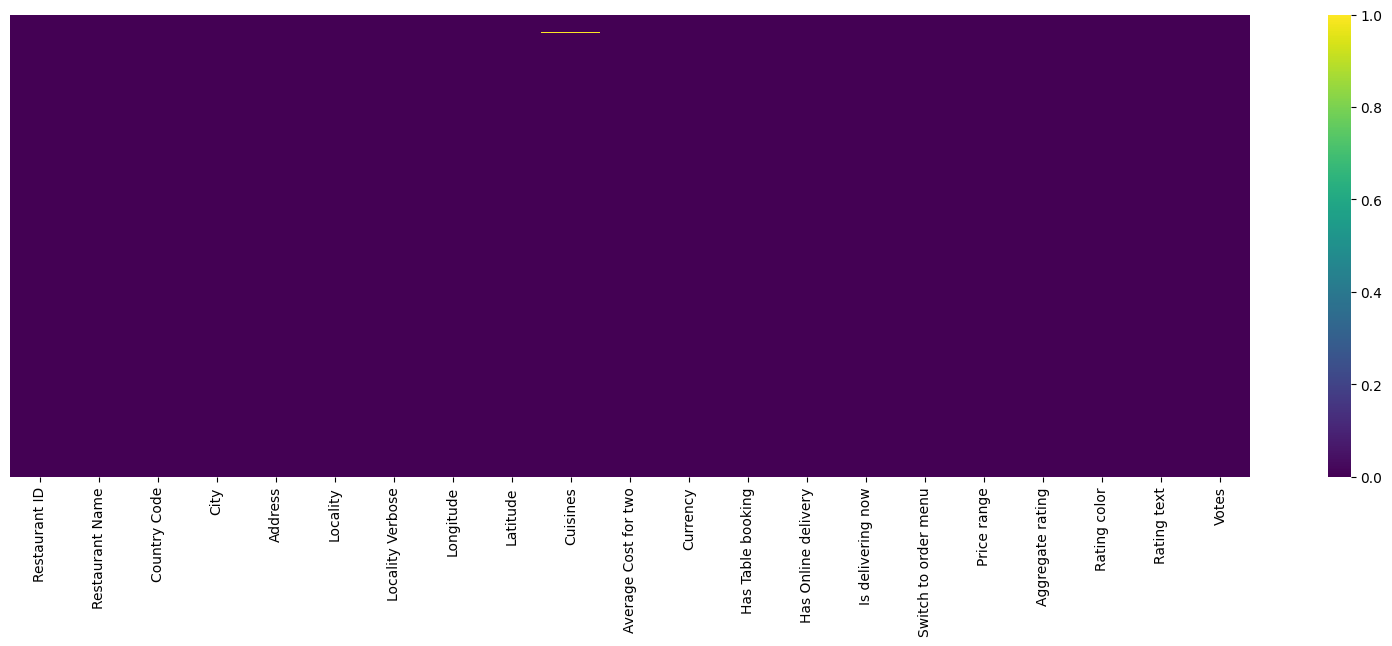

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')
plt.show()

In [10]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


## Checking Columns for 1st Dataset - df

In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Checking Columns for 2nd Dataset - df_country

In [12]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

## Merge Two Dataset

In [13]:
final_df = pd.merge(df_country,df,on='Country Code',how='left')

In [14]:
final_df.head(3)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94


In [15]:
final_df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
feature = final_df[['Country','Restaurant ID','Restaurant Name','City','Average Cost for two',
                   'Votes','Rating color','Rating text']]

for col in feature:
    print("*"*30)
    print(feature[col].unique())   
    print("*"*30)
    print(feature[col].value_counts())
    
   

******************************
['India' 'Australia' 'Brazil' 'Canada' 'Indonesia' 'New Zealand'
 'Phillipines' 'Qatar' 'Singapore' 'South Africa' 'Sri Lanka' 'Turkey'
 'UAE' 'United Kingdom' 'United States']
******************************
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64
******************************
[ 3400025  3400341  3400005 ... 17697332 17694056 17559793]
******************************
3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: Restaurant ID, Length: 9551, dtype: int64
******************************
['Jahanpanah' 'Rangrezz Restauran

In [17]:
country_names = final_df.Country.value_counts().index

In [18]:
country_val = final_df.Country.value_counts().values

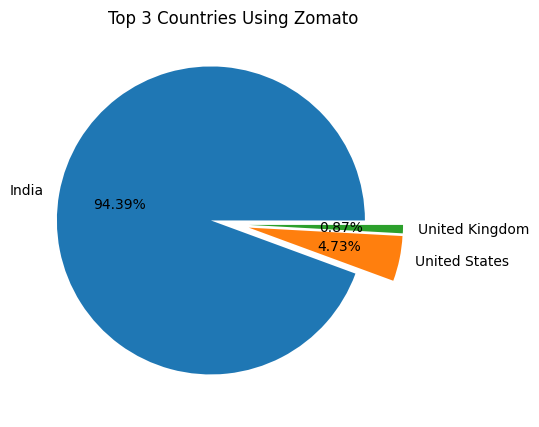

In [19]:
# Top 3 Countries use Zomato
plt.figure(figsize=(20,5))
myexplode = [.15, 0.1, 0.1]
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%',pctdistance=0.6,explode=myexplode)
plt.title('Top 3 Countries Using Zomato')
plt.show()

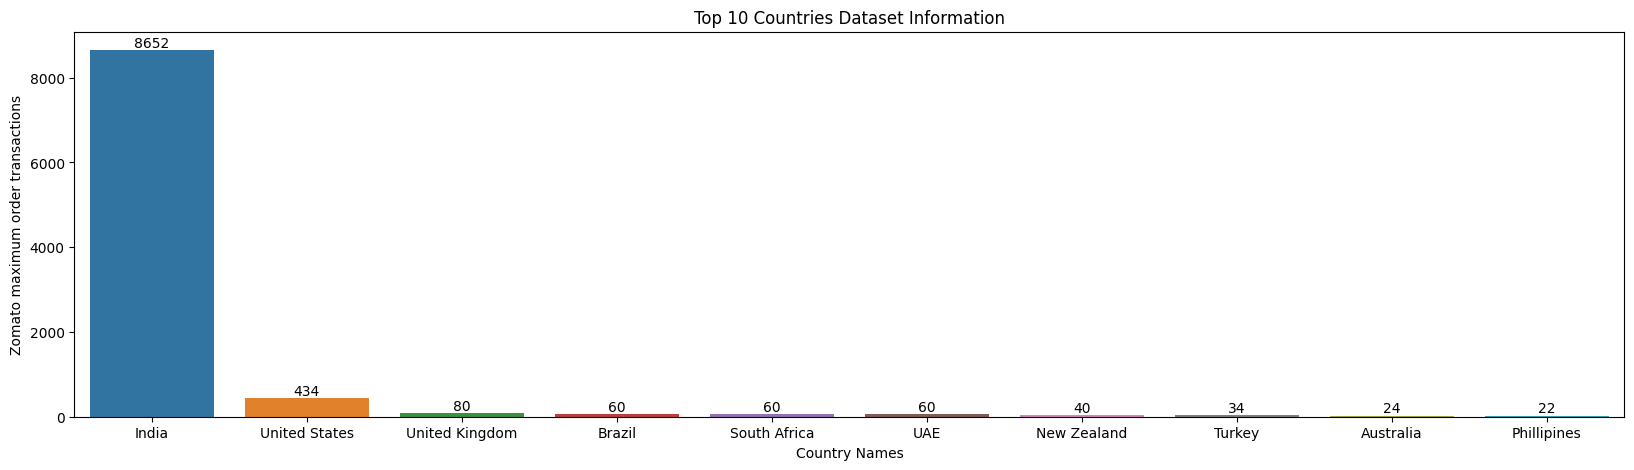

In [20]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = country_names[:10],y = country_val[:10])
ax.bar_label(ax.containers[0])
plt.xlabel('Country Names')
plt.ylabel('Zomato maximum order transactions')
plt.title('Top 10 Countries Dataset Information')
plt.show()

In [21]:
final_df.groupby(['Aggregate rating','Rating color','Rating text','Country']).size()

Aggregate rating  Rating color  Rating text  Country       
0.0               White         Not rated    Brazil               5
                                             India             2139
                                             United Kingdom       1
                                             United States        3
1.8               Red           Poor         India                1
                                                               ... 
4.9               Dark Green    Excellent    Sri Lanka            1
                                             Turkey               3
                                             UAE                  4
                                             United Kingdom       4
                                             United States       14
Length: 222, dtype: int64

### Converting into Dataframe

In [22]:
final_df.groupby(['Aggregate rating','Rating color','Rating text','Country']).size().reset_index().rename(columns= {0:"Rating Count"})

,Aggregate rating,Rating color,Rating text,Country,Rating Count
0,0.0,White,Not rated,Brazil,5
1,0.0,White,Not rated,India,2139
2,0.0,White,Not rated,United Kingdom,1
3,0.0,White,Not rated,United States,3
4,1.8,Red,Poor,India,1
...,...,...,...,...,...
217,4.9,Dark Green,Excellent,Sri Lanka,1
218,4.9,Dark Green,Excellent,Turkey,3
219,4.9,Dark Green,Excellent,UAE,4
220,4.9,Dark Green,Excellent,United Kingdom,4


In [23]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text','Country']).size().reset_index().rename(columns= {0:"Rating Count"})

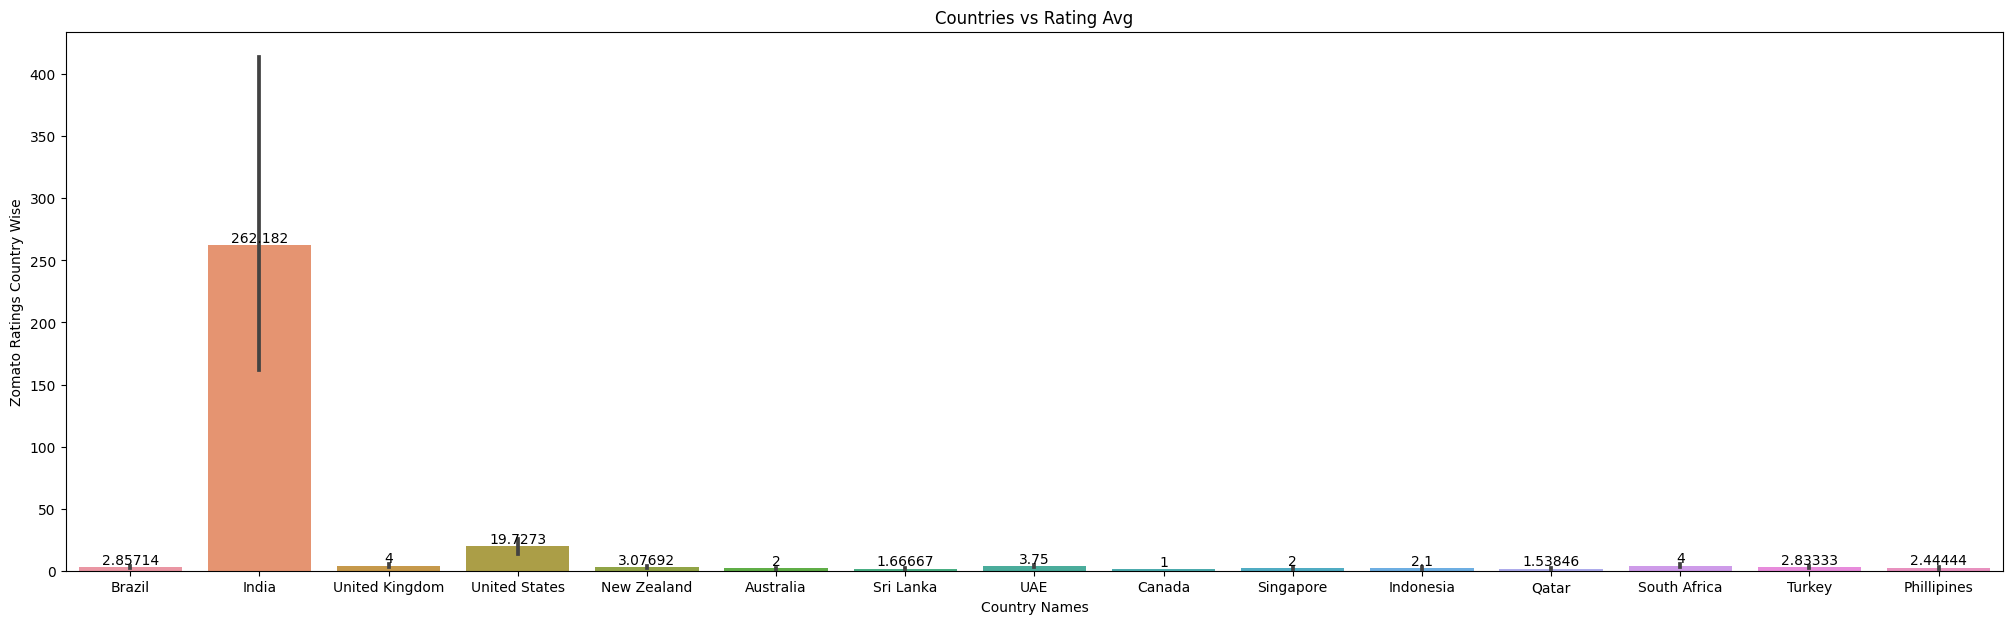

In [24]:
# Analysis Based on Ratings
plt.figure(figsize = (25,7))
ax = sns.barplot(y = ratings['Rating Count'],x = ratings['Country'])
ax.bar_label(ax.containers[0])
plt.xlabel('Country Names')
plt.ylabel('Zomato Ratings Country Wise')
plt.title('Countries vs Rating Avg')
plt.show()

In [25]:
# Average Rating for Brazil Country
ratings[ratings['Country']=='Brazil']['Rating Count'].sum()/21

2.857142857142857

In [26]:
# Zomato Rating Distribution for India
ratings[ratings['Country']=='India']['Rating color'].value_counts()

Orange        10
Red            7
Yellow         5
Green          5
Dark Green     5
White          1
Name: Rating color, dtype: int64

## OBERVATIONS
When Rating is between 4.5 to 4.9---> Excellent

When Rating are between 4.0 to 3.4--->very good

when Rating is between 3.5 to 3.9----> good

when Rating is between 3.0 to 3.4----> average

when Rating is between 2.5 to 2.9----> average

when Rating is between 2.0 to 2.4----> Poor

In [27]:
# Fine the name of country who given minimum and maximum rating
ratings[ratings['Aggregate rating']==0]['Rating Count']

0       5
1    2139
2       1
3       3
Name: Rating Count, dtype: int64

In [28]:
ratings[ratings['Aggregate rating']==0]

,Aggregate rating,Rating color,Rating text,Country,Rating Count
0,0.0,White,Not rated,Brazil,5
1,0.0,White,Not rated,India,2139
2,0.0,White,Not rated,United Kingdom,1
3,0.0,White,Not rated,United States,3


In [29]:
ratings[ratings['Aggregate rating']==4.9]['Rating Count']

210     3
211    19
212     4
213     2
214     3
215     1
216     3
217     1
218     3
219     4
220     4
221    14
Name: Rating Count, dtype: int64

In [30]:
ratings[ratings['Aggregate rating']==4.9]

,Aggregate rating,Rating color,Rating text,Country,Rating Count
210,4.9,Dark Green,Excellent,Brazil,3
211,4.9,Dark Green,Excellent,India,19
212,4.9,Dark Green,Excellent,Indonesia,4
213,4.9,Dark Green,Excellent,New Zealand,2
214,4.9,Dark Green,Excellent,Phillipines,3
215,4.9,Dark Green,Excellent,Qatar,1
216,4.9,Dark Green,Excellent,South Africa,3
217,4.9,Dark Green,Excellent,Sri Lanka,1
218,4.9,Dark Green,Excellent,Turkey,3
219,4.9,Dark Green,Excellent,UAE,4


In [31]:
final_df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [32]:
# Which country do prefer online delievery option
final_df[final_df['Has Online delivery']=='Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

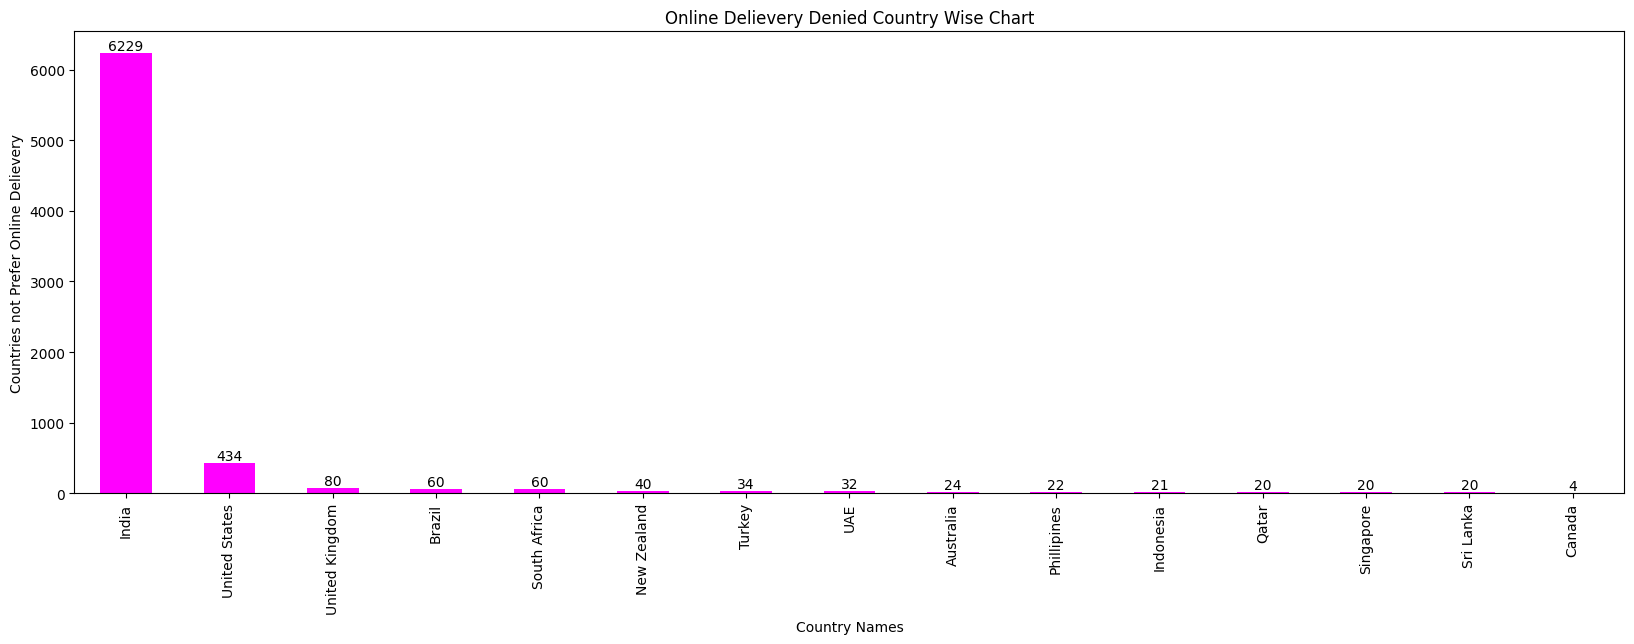

In [33]:
# Which country do not prefer online delievery option
ax = final_df[final_df['Has Online delivery']=='No']['Country'].value_counts().plot(kind='bar',color='magenta')
ax.bar_label(ax.containers[0])
plt.xlabel('Country Names')
plt.ylabel('Countries not Prefer Online Delievery')
plt.title('Online Delievery Denied Country Wise Chart')
plt.show()

In [34]:
final_df[['Country','Has Online delivery']].groupby(['Has Online delivery','Country']).size().reset_index().rename(columns= {0:"Online Delivery Count"}) 

,Has Online delivery,Country,Online Delivery Count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [35]:
couisines = final_df[['Country','Cuisines']].groupby(['Country','Cuisines']).size().reset_index().rename(columns={0:'cuisine Count'})

In [36]:
couisines

,Country,Cuisines,cuisine Count
0,Australia,Asian,1
1,Australia,Australian,1
2,Australia,"Bar Food, Modern Australian",1
3,Australia,"Bar Food, Steak",1
4,Australia,"Breakfast, Coffee and Tea",2
...,...,...,...
1983,United States,"Sushi, Teriyaki",1
1984,United States,"Sushi, Thai",1
1985,United States,Tapas,1
1986,United States,Thai,6


In [37]:
couisines[couisines['Country']=='Australia'].value_counts()

Country    Cuisines                                      cuisine Count
Australia  Asian                                         1                1
           Cafe, Coffee and Tea, Sandwich                1                1
           Pizza, Bar Food                               1                1
           Modern Australian, Australian                 1                1
           Modern Australian                             2                1
           Mediterranean, Seafood                        1                1
           Italian, Fusion, Cafe                         1                1
           Coffee and Tea, Tea, Modern Australian        1                1
           Coffee and Tea, Tapas, Australian             1                1
           Coffee and Tea, Modern Australian             1                1
           Cafe, Coffee and Tea, Modern Australian       1                1
           Australian                                    1                1
           Cafe, 